# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K means merupakan metode yang termasuk pada clustering non-hirarki dimana setiap objek yang masuk dalam kelompok (cluster) adalah objek-objek yang sama dan berkorelasi. Data yang tergabung dalam kelompok (cluster) mempunyai tingkat kemiripan yang lebih besar dan memiliki tingkat perbedaan yang besar pula dengan kelompok (cluster) lainnya.


## **Inertia (Sum Square error/SSE)**


Inersia (atau Sum of Squared Errors, SSE) adalah metrik yang digunakan untuk mengevaluasi kinerja algoritma klastering seperti K-Means. Metrik ini mengukur jumlah kuadrat jarak antara setiap titik data dengan centroid klaster yang ditetapkannya.
Inertia didefinisikan sebagai:

$$
\text{SSE(Inertia)} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
Di mana:


- $k$: Jumlah klaster

$C𝑖$ : Klaster 𝑖

$𝑥$ : Titik data

$𝜇𝑖$ : Centroid klaster 𝑖

$∥x−μ i ∥ 2$ : Jarak Euclidean antara titik data dan centroid

## **Silhouette Analysis**


Silhouette Analysis adalah metode evaluasi kualitas klastering yang mengukur seberapa baik suatu objek berada dalam klasternya dan seberapa jauh objek tersebut dari klaster lain. Ini digunakan untuk menentukan jumlah klaster optimal pada algoritma klastering seperti K-Means.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak antara titik data 𝑖 dengan semua titik lain dalam klasternya (intra-cluster distance)
- $b(i)$:  Rata-rata jarak antara titik data 𝑖 dengan semua titik di klaster terdekat lainnya (nearest-cluster distance)
- $s(i)$: Nilai Silhouette untuk data point 𝑖

**Kriteria Penilaian:**

Silhouette Score mendekati 1: Klaster sangat jelas dan terpisah.

Silhouette Score mendekati 0: Klaster tumpang tindih atau tidak jelas.

Silhouette Score mendekati -1: Terjadi kesalahan penempatan klaster.

**Penggunaan:**

Silhouette Analysis biasanya digunakan untuk memilih jumlah klaster optimal.

Skor dapat dihitung untuk berbagai jumlah klaster, kemudian diplot untuk menemukan jumlah klaster yang menghasilkan skor tertinggi.


## **Implementasi dengan menggunakan data Iris**

In [6]:
%pip install pymysql
%pip install psycopg2

## **Library yang digunakan**

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [8]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-138e7d50-postgresqllll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_hUJVkoNFS0qvBDXnrxU",
        database="defaultdb",
        port=10802
    )
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM  "Naufal"."postgree"')
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-2386dab1-myysqll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_bZVPOBZt5yW-M1GcqrS",
        database="defaultdb",
        port=22065
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa          31.0         40.0          31.0         40.0
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          24.0         70.0          50.0         60.0
  7     Iris-setosa          40.0         30.0          40.0         30.0
  8     Iris-setosa           1.5          5.0           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.6          1.1           4.9          3.1
 11     Iris-setosa           7.0          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [10]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[ 2.78508687  2.68023902  2.69472915  2.57453238]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[ 4.246769    4.31505028  4.54154608  4.88758176]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]
 [ 2.41966634  2.2715362   2.23302492  1.99627004]]
Akurasi (Adjusted Rand Score): -0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[ 3.87101524  2.20341906  3.12091767  2.57453238]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]
 [ 1.93588338  2.44182904  2.14000758  1.99627004]
 [ 4.99827652  7.21002857  5.55628066  7.77889348]]
Akurasi (Adjusted Rand Score): -0.002


## **Plotting dengan Jumlah Cluster 2, 3 dan 4**

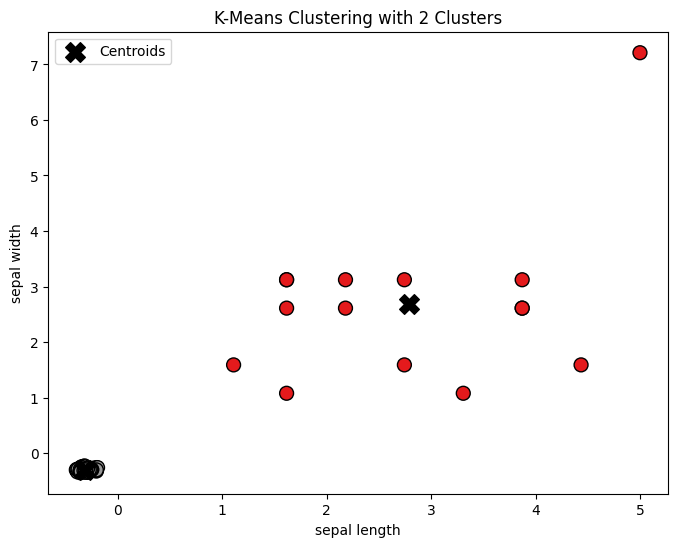

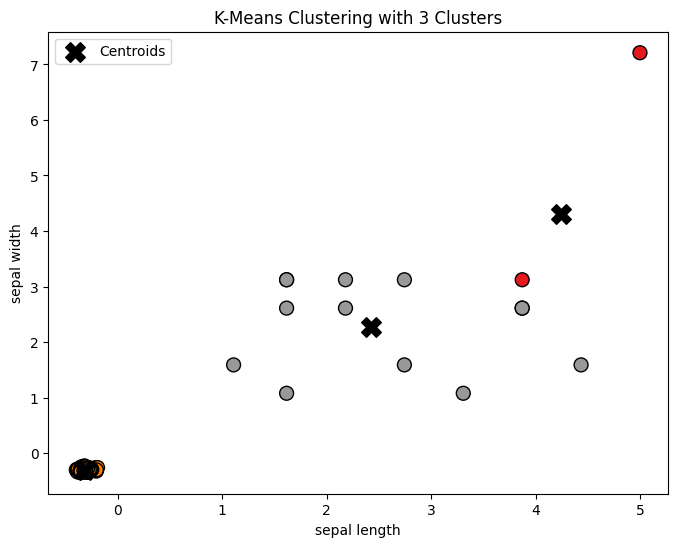

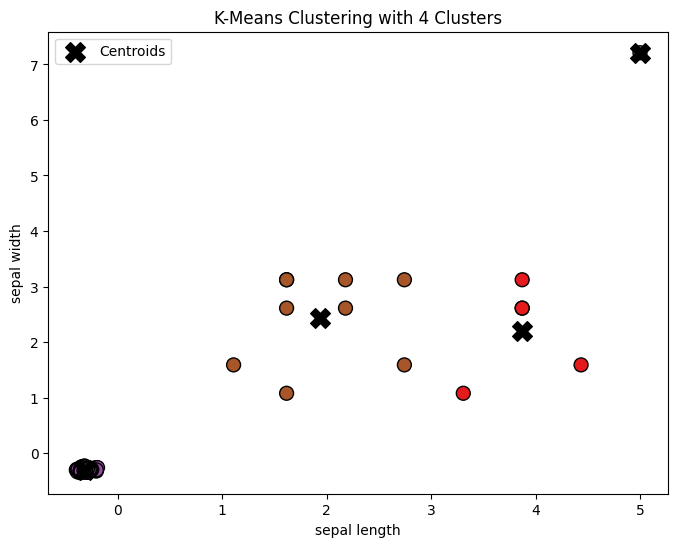

In [11]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Cluster 2,3 dan 4**

In [12]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[ 2.78508687  2.68023902  2.69472915  2.57453238]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.35057826 -0.27434177 -0.44688911 -0.34207832]), Klaster: 1, Centroid: [-0.3094541  -0.29780434 -0.29941435 -0.28605915], Jarak kuadrat: 0.027, Inertia sementara: 0.027
Titik data 2 (Fitur: [-0.36185087 -0.29988569 -0.44688911 -0.34207832]), Klaster: 1, Centroid: [-0.3094541  -0.29780434 -0.29941435 -0.28605915], Jarak kuadrat: 0.028, Inertia sementara: 0.055
Titik data 3 (Fitur: [1.1092251  1.59036484 1.3552795  1.81556306]), Klaster: 0, Centroid: [2.78508687 2.68023902 2.69472915 2.57453238], Jarak kuadrat: 6.366, Inertia sementara: 6.421
Titik data 4 (Fitur: [-0.37875979 -0.29477691 -0.4408007  -0.34207832]), Klaster: 1, Centroid: [-0.3094541  -0.29780434 -0.29941435 -0.28605915], Jarak kuadrat: 0.028, Inertia sementara: 6.449
Titik data 5 (Fitu

## **Diagram Elbow Method**

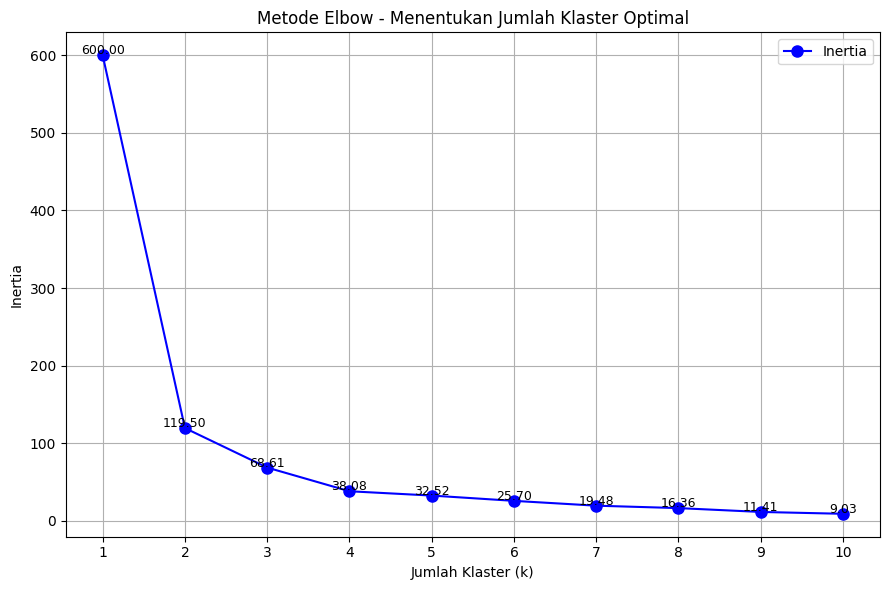

In [13]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[ 2.78508687  2.68023902  2.69472915  2.57453238]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]]
Silhouette Score untuk 2 klaster: 0.919

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[ 4.246769    4.31505028  4.54154608  4.88758176]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]
 [ 2.41966634  2.2715362   2.23302492  1.99627004]]
Silhouette Score untuk 3 klaster: 0.909

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[ 3.87101524  2.20341906  3.12091767  2.57453238]
 [-0.3094541  -0.29780434 -0.29941435 -0.28605915]
 [ 1.93588338  2.44182904  2.14000758  1.99627004]
 [ 4.99827652  7.21002857  5.55628066  7.77889348]]
Silhouette Score untuk 4 klaster: 0.895

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 2 (dengan score = 0.919)


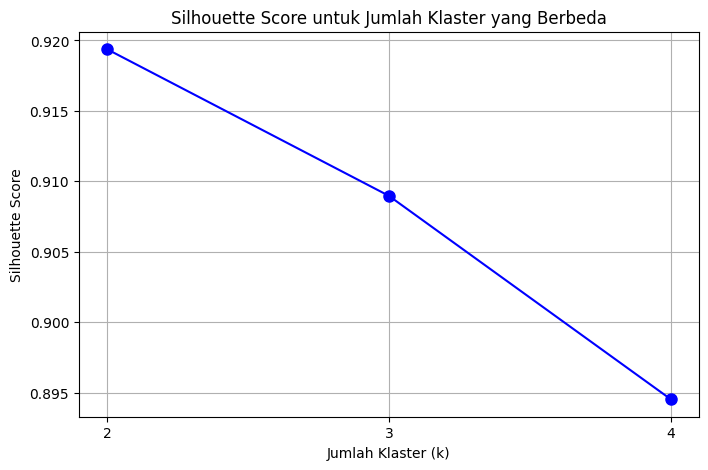

In [14]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()